In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import csv
import datetime
import moment

# import api key
from config import api_key
   
# Weather URL
#History weather bulk for Detroit from January 01, 2014 to December 31, 2018
weather_url = "http://history.openweathermap.org//storage/dc1e5df660e33aec203660c9b2000bc3.json"
solunar_url = "https://api.solunar.org/solunar/latitude,longitude,date,tz"
#https://api.solunar.org/solunar/42.66,-84.07,20180207,-4

# make request and store response
response = requests.get(weather_url)
response_2 = requests.get(solunar_url)

# print status code
print(response.status_code)
print(response_2.status_code)

200
200


In [2]:
#JSONify response
response_json = response.json()
response_2_json = response_2.json()

In [3]:
# print first article
print(f"The first response is {json.dumps(response_json[0], indent=4)}.")

The first response is {
    "city_id": 4990729,
    "main": {
        "temp": 265.33,
        "temp_min": 263.71,
        "temp_max": 266.48,
        "pressure": 1025,
        "humidity": 61
    },
    "wind": {
        "speed": 5,
        "deg": 250
    },
    "clouds": {
        "all": 90
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04"
        }
    ],
    "dt": 1388534400,
    "dt_iso": "2014-01-01 00:00:00 +0000 UTC"
}.


In [4]:
# count of responses
print(f"We received {len(response_json)} responses.")
unixDict = {}
i = 0
for entry in response_json:
    i = i + 1
    if i > 50:
        break
    try:
        unixDict[entry['dt']] = {
            'temp_max': entry['main']['temp_max'],
            'wind_speed': entry['wind']['speed'],
            'weather_main': entry['weather'][0]['main']
        }
    except:
        print(f'no data for {entry["dt"]}')
print(unixDict)

We received 33454 responses.
{1388534400: {'temp_max': 266.48, 'wind_speed': 5, 'weather_main': 'Clouds'}, 1388538000: {'temp_max': 265.93, 'wind_speed': 4, 'weather_main': 'Clouds'}, 1388541600: {'temp_max': 265.93, 'wind_speed': 4, 'weather_main': 'Clouds'}, 1388545200: {'temp_max': 265.37, 'wind_speed': 1, 'weather_main': 'Snow'}, 1388548800: {'temp_max': 265.37, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388552400: {'temp_max': 265.37, 'wind_speed': 0, 'weather_main': 'Snow'}, 1388556000: {'temp_max': 265.37, 'wind_speed': 0, 'weather_main': 'Snow'}, 1388559600: {'temp_max': 265.37, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388563200: {'temp_max': 265.15, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388566800: {'temp_max': 265.15, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388570400: {'temp_max': 265.15, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388574000: {'temp_max': 264.26, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388577600: {'temp_max': 264.15, 'wind_speed': 1, 'weather_main'

In [5]:
# reference to CSV file
DET_csv = os.path.join("City Data","Detroit","detroit_data_fixed.csv")

with open(DET_csv, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    print(csvreader)

DET_crime_df = pd.read_csv(DET_csv)
DET_crime_df.head()


,Location,Offense,Date,Unix Date
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400


In [6]:
DET_crime_df["Temp_Max"] = ""
DET_crime_df["Wind_Speed"] = ""
DET_crime_df["Weather_Type"] = ""
DET_crime_df.head()

,Location,Offense,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800,,,
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200,,,
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600,,,
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600,,,
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400,,,


In [7]:
# create a params dict that will be updated with weather data each iteration
params = {"key": api_key}
weather_url = "http://history.openweathermap.org//storage/dc1e5df660e33aec203660c9b2000bc3.json"


In [8]:
# Use unix date to identify weather

def getWeather(t,val):
    #print(t['Unix Date'])
    try:
        return unixDict[t['Unix Date']][val]
    except:
        return 'N/A'

DET_crime_df['Temp_Max'] = DET_crime_df.apply(lambda row: getWeather(row,'temp_max'),axis=1)
DET_crime_df['Wind_Speed'] = DET_crime_df.apply(lambda row: getWeather(row, 'wind_speed'),axis=1)
DET_crime_df['Weather_Type'] = DET_crime_df.apply(lambda row: getWeather(row, 'weather_main'),axis=1)


In [32]:
weather_df = DET_crime_df.loc[DET_crime_df['Temp_Max'] != 'N/A']
weather_df.head(10)

,Location,Offense,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800,284.618,4,Clouds
22,"(42.3783, -83.0786)",FRAUD: FRAUD (OTHER),01/01/2014,1388552400,265.37,0,Snow
23,"(42.3954, -83.08)",FRAUD: FRAUD (OTHER),01/01/2014,1388552400,265.37,0,Snow
24,"(42.4049, -82.9767)",MISCELLANEOUS: MISCELLANEOUS - GENERAL ASSISTANCE,01/01/2014,1388552400,265.37,0,Snow
25,"(42.3934, -83.1237)",FRAUD: FRAUD (OTHER),01/01/2014,1388552400,265.37,0,Snow
26,"(42.3087, -83.105)",FRAUD: FRAUD (OTHER),01/01/2014,1388552400,265.37,0,Snow
27,"(42.3386, -83.1077)",DAMAGE TO PROPERTY: DAMAGE TO PROPERTY - PRIVA...,01/01/2014,1388552400,265.37,0,Snow
28,"(42.4245, -83.2526)",FRAUD: FRAUD (OTHER),01/01/2014,1388552400,265.37,0,Snow
29,"(42.3976, -83.2194)",FRAUD: FRAUD (OTHER),01/01/2014,1388552400,265.37,0,Snow
30,"(42.4379, -83.2252)",LARCENY: LARCENY - FROM BUILDING (INCLUDES LIB...,01/01/2014,1388552400,265.37,0,Snow


In [20]:
#new data frame with split value columns 
new_weather_df = weather_df["Offense"].str.split(":", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
weather_df["Offense Main"]= new_weather_df[0] 
  
# making seperate last name column from new data frame 
weather_df["Offense Sub"]= new_weather_df[1] 
  
# Dropping old Name columns 
weather_df.drop(columns =["Offense"], inplace = True) 
  
# df display 
weather_df.head(10)

C:\Users\ryanb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ryanb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ryanb\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

,Location,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type,Offense Main,Offense Sub
0,"(42.4224, -82.986)",01/02/2014,1388638800,284.618,4,Clouds,LARCENY,LARCENY (OTHER)
22,"(42.3783, -83.0786)",01/01/2014,1388552400,265.37,0,Snow,FRAUD,FRAUD (OTHER)
23,"(42.3954, -83.08)",01/01/2014,1388552400,265.37,0,Snow,FRAUD,FRAUD (OTHER)
24,"(42.4049, -82.9767)",01/01/2014,1388552400,265.37,0,Snow,MISCELLANEOUS,MISCELLANEOUS - GENERAL ASSISTANCE
25,"(42.3934, -83.1237)",01/01/2014,1388552400,265.37,0,Snow,FRAUD,FRAUD (OTHER)
26,"(42.3087, -83.105)",01/01/2014,1388552400,265.37,0,Snow,FRAUD,FRAUD (OTHER)
27,"(42.3386, -83.1077)",01/01/2014,1388552400,265.37,0,Snow,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY - PRIVATE PROPERTY
28,"(42.4245, -83.2526)",01/01/2014,1388552400,265.37,0,Snow,FRAUD,FRAUD (OTHER)
29,"(42.3976, -83.2194)",01/01/2014,1388552400,265.37,0,Snow,FRAUD,FRAUD (OTHER)
30,"(42.4379, -83.2252)",01/01/2014,1388552400,265.37,0,Snow,LARCENY,"LARCENY - FROM BUILDING (INCLUDES LIBRARY, OF..."


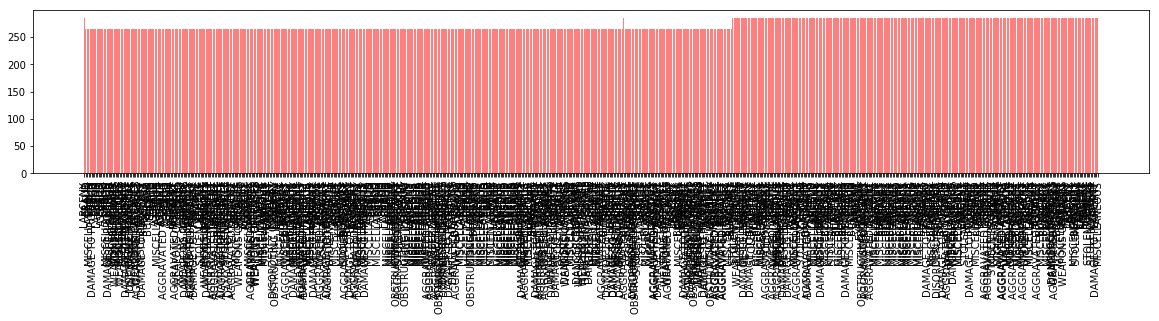

In [29]:
# Set x axis and tick locations
x_axis = np.arange(len(weather_df))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, weather_df["Temp_Max"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, weather_df["Offense Main"], rotation="vertical")
plt.show()

In [30]:
maker_group = weather_df.groupby('Offense Main')

# Count how many times each maker appears in our group
count_makers = maker_group['Offense Main'].count()

count_makers


Offense Main
AGGRAVATED ASSAULT         52
ARSON                       1
ASSAULT                    98
BURGLARY                   54
DAMAGE TO PROPERTY         44
DANGEROUS DRUGS            12
DISORDERLY CONDUCT          3
EMBEZZLEMENT                1
ENVIRONMENT                 1
ESCAPE                      5
EXTORTION                   1
FRAUD                      76
HOMICIDE                    1
JUSTIFIABLE HOMICIDE        1
KIDNAPING                   1
LARCENY                    85
MISCELLANEOUS             155
OBSTRUCTING JUDICIARY       7
OBSTRUCTING THE POLICE      2
OTHER                       2
OUIL                        2
ROBBERY                    28
STOLEN PROPERTY             2
STOLEN VEHICLE             40
TRAFFIC                    23
WEAPONS OFFENSES           20
Name: Offense Main, dtype: int64

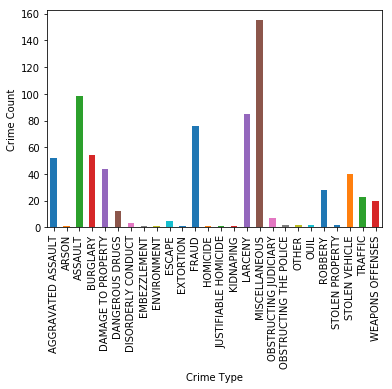

<Figure size 432x288 with 0 Axes>

In [34]:
count_chart = count_makers.plot(kind='bar')
count_chart.set_xlabel("Crime Type")
count_chart.set_ylabel("Crime Count")
plt.show()
plt.tight_layout()


In [26]:
# Calculate Type Percents
#group by city type
type_group = weather_df.groupby('Offense Main')

#all fares and totals
#total_fares = type_group['fare'].sum()
#rural_total = total_fares['Rural']
#urban_total = total_fares['Urban']
#suburban_total = total_fares['Suburban']


# Build Pie Chart
#labels = ['Rural', 'Urban', 'Suburban']
#sums = [rural_total, urban_total, suburban_total]
#colors = ['gold', 'lightcoral','lightskyblue']
#explode = (0, .2, 0)
#plt.pie(sums, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 270, explode = explode)
#plt.title('% of Total Fares by City Type')

plt.pie
plt.show()

# Save Figure
#plt.savefig("../Images/fares.png")